In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [26]:
estate = pd.read_excel(r"C:\Users\Admin\Desktop\Excel\Estate_1_2_3.xlsx")
print(estate)

      bhk_type property_type  bedrooms  bathroom  balcony  \
0            4     Apartment         4         4        1   
1            3     Apartment         3         2        1   
2            2     Apartment         2         2        2   
3            3     Apartment         3         2        1   
4            1     Apartment         1         1        1   
...        ...           ...       ...       ...      ...   
3444         2     Apartment         2         1        1   
3445         1     Apartment         1         1        1   
3446         4         Villa         4         5        1   
3447         2     Apartment         2         1        1   
3448         5         Villa         5         7        1   

                                                address      city  state_code  \
0                      West Superior Street Chicago IL     Chicago        312   
1                   North Claremont Avenue  Chicago IL     Chicago        312   
2                       

# Cleaning, Preprocessing data and EDA

In [27]:
estate.columns = estate.columns.str.strip()

In [28]:
estate.columns

Index(['bhk_type', 'property_type', 'bedrooms', 'bathroom', 'balcony',
       'address', 'city', 'state_code', 'country', 'landmark', 'carpet_area',
       'status', 'year_built', 'price_per_sqft', 'furnished_status', 'facing',
       'type_of_ownership', 'buy_total_price'],
      dtype='object')

In [29]:
estate.head()

,bhk_type,property_type,bedrooms,bathroom,balcony,address,city,state_code,country,landmark,carpet_area,status,year_built,price_per_sqft,furnished_status,facing,type_of_ownership,buy_total_price
0,4,Apartment,4,4,1,West Superior Street Chicago IL,Chicago,312,United States,Compass,5750,Available for Sale,1996,9225,Unfurnished,North,Freehold,519000.0
1,3,Apartment,3,2,1,North Claremont Avenue Chicago IL,Chicago,312,United States,Compass,1550,Under Contract,1969,23143,Unfurnished,North,Freehold,399900.0
2,2,Apartment,2,2,2,West Walton Street Chicago IL,Chicago,312,United States,Compass,1550,Active,1969,21625,Unfurnished,East,Freehold,575000.0
3,3,Apartment,3,2,1,West Walton Street Chicago IL,Chicago,312,United States,Compass,6219,Available for Sale,1911,27171,Furnished,West,Freehold,350000.0
4,1,Apartment,1,1,1,North Canal Street Chicago IL,Chicago,312,United States,Compass,6219,Active,1922,44250,Unfurnished,South,Freehold,159900.0


In [30]:
estate.shape

(3449, 18)

In [31]:
estate.isnull().sum()

bhk_type             0
property_type        0
bedrooms             0
bathroom             0
balcony              0
address              0
city                 0
state_code           0
country              0
landmark             0
carpet_area          0
status               0
year_built           0
price_per_sqft       0
furnished_status     0
facing               0
type_of_ownership    0
buy_total_price      0
dtype: int64

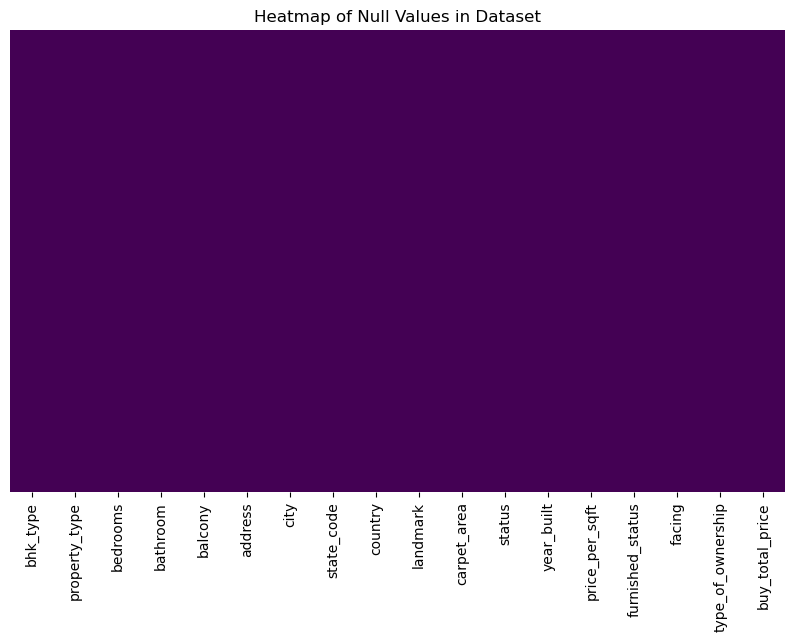

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(estate.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap of Null Values in Dataset')
plt.show()

In [53]:
estate['property_type'].unique()

array(['Apartment', 'Villa', 'TownHouse', 'Duplex', 'Condo',
       'mobile House', 'House', 'New development', 'PentHouse', 'Studio',
       'Bungalow', 'Flat', 'Condo ', 'House ', 'TownHouse ', 'Coop ',
       'Multifamily House ', 'Contingent', 'Land ', 'Foreclosure',
       'Pending', 'Coming Soon', 'Villa Compound'], dtype=object)

In [54]:
estate['property_type'].nunique()

23

In [56]:
for i in estate.columns:
    print(estate[i].value_counts())
    print("\n")

bhk_type
2     1006
3      931
1      479
4      471
5      299
6      148
7       53
8       25
12      13
9       13
11       5
15       2
16       2
14       1
35       1
Name: count, dtype: int64


property_type
Apartment             1324
House                  420
House                  299
Villa                  295
Coop                   224
Multifamily House      176
TownHouse              145
Condo                  128
New development        100
TownHouse               65
Flat                    55
Condo                   44
Pending                 35
Land                    33
PentHouse               30
Duplex                  23
mobile House            20
Contingent              15
Foreclosure             10
Studio                   3
Bungalow                 2
Coming Soon              2
Villa Compound           1
Name: count, dtype: int64


bedrooms
2     1027
3      938
1      485
4      452
5      305
6      150
7       52
8       26
9       13
14       1
Name: count, dty

In [57]:
estate['buy_total_price'].unique()

array([5.19000000e+05, 3.99900000e+05, 5.75000000e+05, 3.50000000e+05,
       1.59900000e+05, 7.00000000e+05, 1.70000000e+05, 1.55000000e+05,
       1.20000000e+06, 2.94000000e+07, 6.06000000e+07, 3.24000000e+07,
       2.81000000e+07, 2.93000000e+07, 7.18000000e+07, 2.77000000e+07,
       2.33000000e+07, 2.85000000e+07, 2.12000000e+07, 4.06000000e+07,
       1.49000000e+07, 4.49000000e+07, 4.40000000e+07, 6.53000000e+07,
       6.91000000e+07, 4.42000000e+07, 8.57000000e+07, 6.00000000e+07,
       9.00000000e+07, 4.51000000e+07, 1.10000000e+07, 2.75000000e+07,
       2.70000000e+07, 2.90000000e+07, 2.80000000e+07, 4.43000000e+07,
       4.93000000e+07, 5.69500000e+07, 6.46700000e+07, 7.23900000e+07,
       8.01100000e+07, 8.78300000e+07, 9.55500000e+07, 4.44000000e+07,
       2.90000000e+06, 1.10000000e+06, 9.00000000e+05, 5.40000000e+07,
       6.51000000e+07, 2.30000000e+07, 9.00000000e+06, 6.50000000e+07,
       7.65000000e+07, 1.59900000e+07, 5.00000000e+07, 2.10000000e+07,
      

In [58]:
estate['buy_total_price'].nunique()

929

In [63]:
data = {
    'bhk_type': ['1', '2', '3', '4', '5'],
    'bedrooms': ['1', '2', '3', '4', '5'],
    'bathroom': ['1', '2', '3', '4', '5'],
    'carpet_area': ['1000', '1500', '2000', '2500', '3000'],
    'property_type': ['1', '2', '3', 'Apartment', 'Villa'],  # Non-numeric example
    'buy_total_price': ['1000000', '2000000', '3000000', '4000000', '5000000']
}
estate = pd.DataFrame(data)
print("Initial Data Types:")
print(estate.dtypes)

columns_to_convert = ['bhk_type', 'bedrooms', 'bathroom', 'carpet_area', 'buy_total_price']

for column in columns_to_convert:
    estate[column] = pd.to_numeric(estate[column], errors='coerce').fillna(0).astype(int)

non_numeric_columns = ['property_type']

print("\nUpdated Data Types:")
print(estate.dtypes)

print("\nDataFrame:")
print(estate)

Initial Data Types:
bhk_type           object
bedrooms           object
bathroom           object
carpet_area        object
property_type      object
buy_total_price    object
dtype: object

Updated Data Types:
bhk_type            int32
bedrooms            int32
bathroom            int32
carpet_area         int32
property_type      object
buy_total_price     int32
dtype: object

DataFrame:
   bhk_type  bedrooms  bathroom  carpet_area property_type  buy_total_price
0         1         1         1         1000             1          1000000
1         2         2         2         1500             2          2000000
2         3         3         3         2000             3          3000000
3         4         4         4         2500     Apartment          4000000
4         5         5         5         3000         Villa          5000000


In [64]:
estate = pd.get_dummies(estate, columns=non_numeric_columns)
print("\nDataFrame after One-Hot Encoding:")
print(estate)


DataFrame after One-Hot Encoding:
   bhk_type  bedrooms  bathroom  carpet_area  buy_total_price  \
0         1         1         1         1000          1000000   
1         2         2         2         1500          2000000   
2         3         3         3         2000          3000000   
3         4         4         4         2500          4000000   
4         5         5         5         3000          5000000   

   property_type_1  property_type_2  property_type_3  property_type_Apartment  \
0             True            False            False                    False   
1            False             True            False                    False   
2            False            False             True                    False   
3            False            False            False                     True   
4            False            False            False                    False   

   property_type_Villa  
0                False  
1                False  
2           

In [65]:
estate_int = estate.astype(int)
print("\nDataFrame with Boolean Values Converted to Integers:")
print(estate_int)


DataFrame with Boolean Values Converted to Integers:
   bhk_type  bedrooms  bathroom  carpet_area  buy_total_price  \
0         1         1         1         1000          1000000   
1         2         2         2         1500          2000000   
2         3         3         3         2000          3000000   
3         4         4         4         2500          4000000   
4         5         5         5         3000          5000000   

   property_type_1  property_type_2  property_type_3  property_type_Apartment  \
0                1                0                0                        0   
1                0                1                0                        0   
2                0                0                1                        0   
3                0                0                0                        1   
4                0                0                0                        0   

   property_type_Villa  
0                    0  
1                 

In [143]:
data = {
    'property_type': ['Type_1', 'Type_2', 'Type_3', 'Apartment', 'Villa'],
    'buy_total_price': [1000000, 1500000, 2000000, 2500000, 3000000],
    'carpet_area': [500, 750, 1000, 1250, 1500]
}
estate = pd.DataFrame(data)
print("Before renaming:")
print(estate)

estate['property_type'] = estate['property_type'].replace({'Type_1': 'House'})

print("After renaming:")
print(estate)

Before renaming:
  property_type  buy_total_price  carpet_area
0        Type_1          1000000          500
1        Type_2          1500000          750
2        Type_3          2000000         1000
3     Apartment          2500000         1250
4         Villa          3000000         1500
After renaming:
  property_type  buy_total_price  carpet_area
0         House          1000000          500
1        Type_2          1500000          750
2        Type_3          2000000         1000
3     Apartment          2500000         1250
4         Villa          3000000         1500


In [67]:
estate_int.head()

,bhk_type,bedrooms,bathroom,carpet_area,buy_total_price,property_type_1,property_type_2,property_type_3,property_type_Apartment,property_type_Villa
0,1,1,1,1000,1000000,1,0,0,0,0
1,2,2,2,1500,2000000,0,1,0,0,0
2,3,3,3,2000,3000000,0,0,1,0,0
3,4,4,4,2500,4000000,0,0,0,1,0
4,5,5,5,3000,5000000,0,0,0,0,1


In [71]:
estate_int.duplicated().sum()

0

In [73]:
estate_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   bhk_type                 5 non-null      int32
 1   bedrooms                 5 non-null      int32
 2   bathroom                 5 non-null      int32
 3   carpet_area              5 non-null      int32
 4   buy_total_price          5 non-null      int32
 5   property_type_1          5 non-null      int32
 6   property_type_2          5 non-null      int32
 7   property_type_3          5 non-null      int32
 8   property_type_Apartment  5 non-null      int32
 9   property_type_Villa      5 non-null      int32
dtypes: int32(10)
memory usage: 332.0 bytes


In [35]:
estate.describe()

,bhk_type,bedrooms,bathroom,balcony,carpet_area,year_built,price_per_sqft,buy_total_price
count,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3.449000e+03,3.449000e+03
mean,3.062047,2.983184,2.861409,1.465642,1150.416643,2012.624239,3.098350e+05,1.248269e+07
std,1.785538,1.528824,1.596632,0.584054,1451.467833,7.575739,2.031561e+06,5.881518e+07
min,1.000000,1.000000,1.000000,1.000000,28.000000,1911.000000,1.800000e+01,8.600000e+04
25%,2.000000,2.000000,2.000000,1.000000,252.000000,2007.000000,1.202000e+03,7.650000e+05
50%,3.000000,3.000000,2.000000,1.000000,650.000000,2013.000000,1.897000e+03,1.350000e+06
75%,4.000000,4.000000,4.000000,2.000000,1733.000000,2018.000000,3.485300e+04,2.800000e+06
max,35.000000,14.000000,9.000000,3.000000,24750.000000,2024.000000,4.800000e+07,1.909437e+09


In [36]:
for i in estate.select_dtypes(include="object").columns:
    print(estate[i].value_counts())
    print("***"*10)

property_type
Apartment             1324
House                  420
House                  299
Villa                  295
Coop                   224
Multifamily House      176
TownHouse              145
Condo                  128
New development        100
TownHouse               65
Flat                    55
Condo                   44
Pending                 35
Land                    33
PentHouse               30
Duplex                  23
mobile House            20
Contingent              15
Foreclosure             10
Studio                   3
Bungalow                 2
Coming Soon              2
Villa Compound           1
Name: count, dtype: int64
******************************
address
Unavailable                                     427
Khalifa City Abu Dhabi                          167
Mohammed Bin Zayed City Abu Dhabi               121
Madinat Al Riyadh Abu Dhabi                      52
Shakhbout City Abu Dhabi                         41
                                        

In [37]:
estate.describe(include="object")

,property_type,address,city,state_code,country,landmark,status,furnished_status,facing,type_of_ownership
count,3449,3449,3449,3449,3449,3449,3449,3449,3449,3449
unique,23,1332,22,423,5,703,4,2,4,2
top,Apartment,Unavailable,Abu Dhabi,897,Dubai,New York,Available for Sale,Unfurnished,East,Freehold
freq,1324,427,1300,1300,1300,1000,1342,3174,877,3407


# Data Visualisation

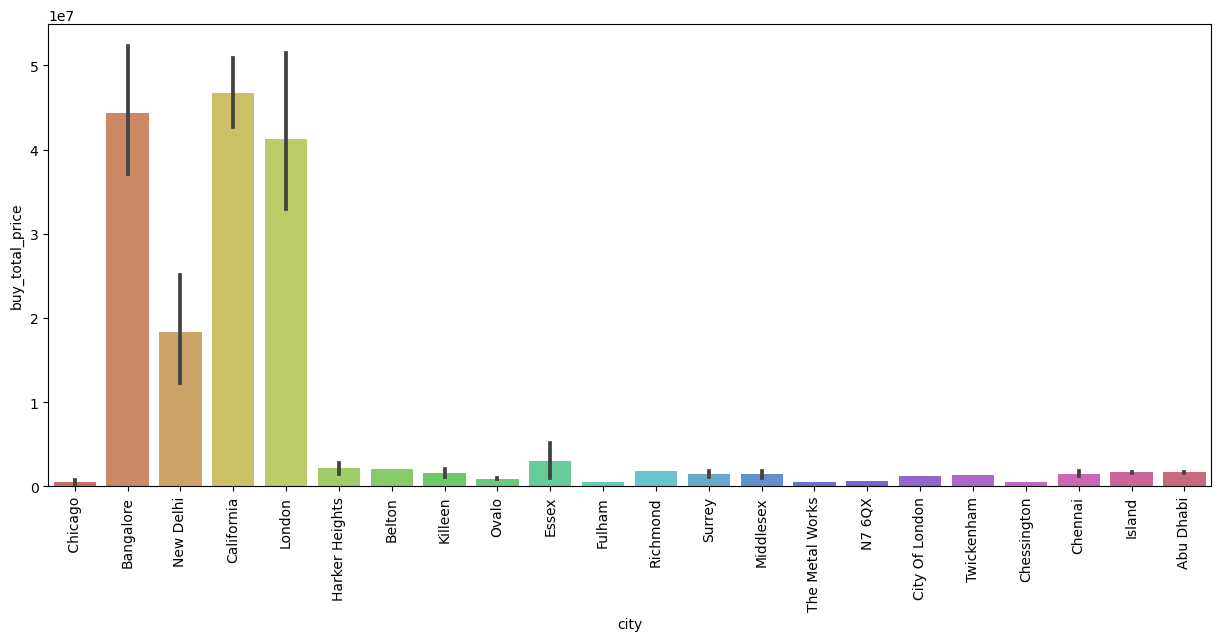

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x=estate['city'], y=estate['buy_total_price'], data=estate.head(10), palette='hls')
plt.xticks(rotation=90)
plt.show()

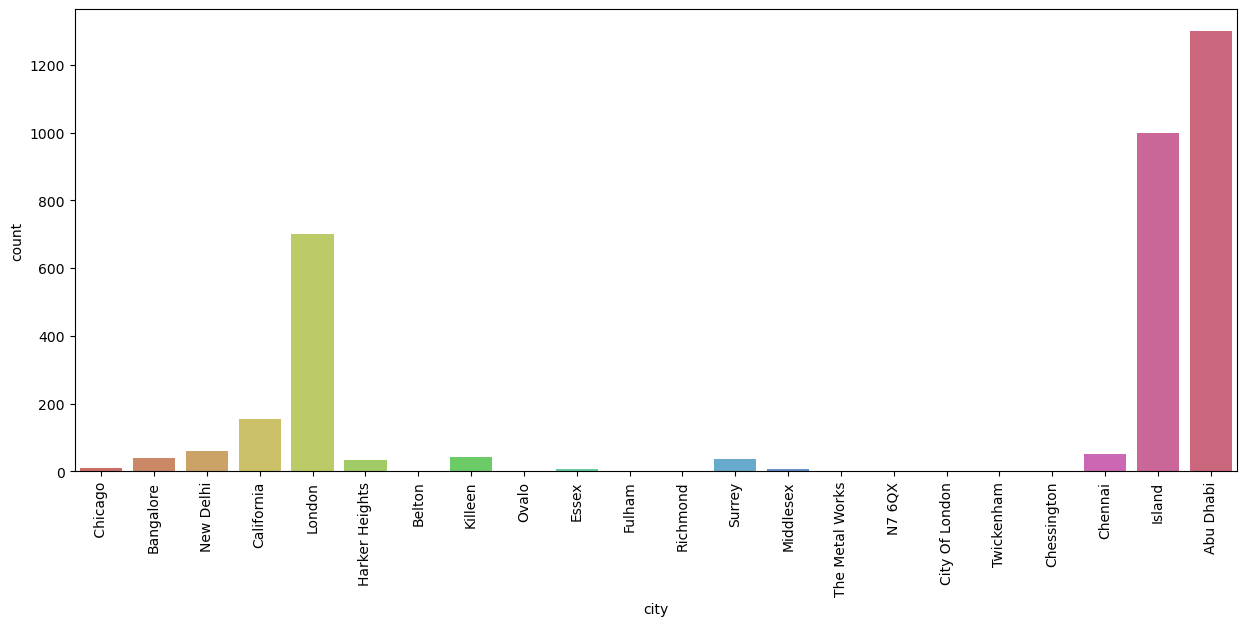

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(x=estate['city'], data=estate, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [46]:
property_type_counts = estate['property_type'].value_counts()
print(property_type_counts)

property_type
Apartment             1324
House                  420
House                  299
Villa                  295
Coop                   224
Multifamily House      176
TownHouse              145
Condo                  128
New development        100
TownHouse               65
Flat                    55
Condo                   44
Pending                 35
Land                    33
PentHouse               30
Duplex                  23
mobile House            20
Contingent              15
Foreclosure             10
Studio                   3
Bungalow                 2
Coming Soon              2
Villa Compound           1
Name: count, dtype: int64


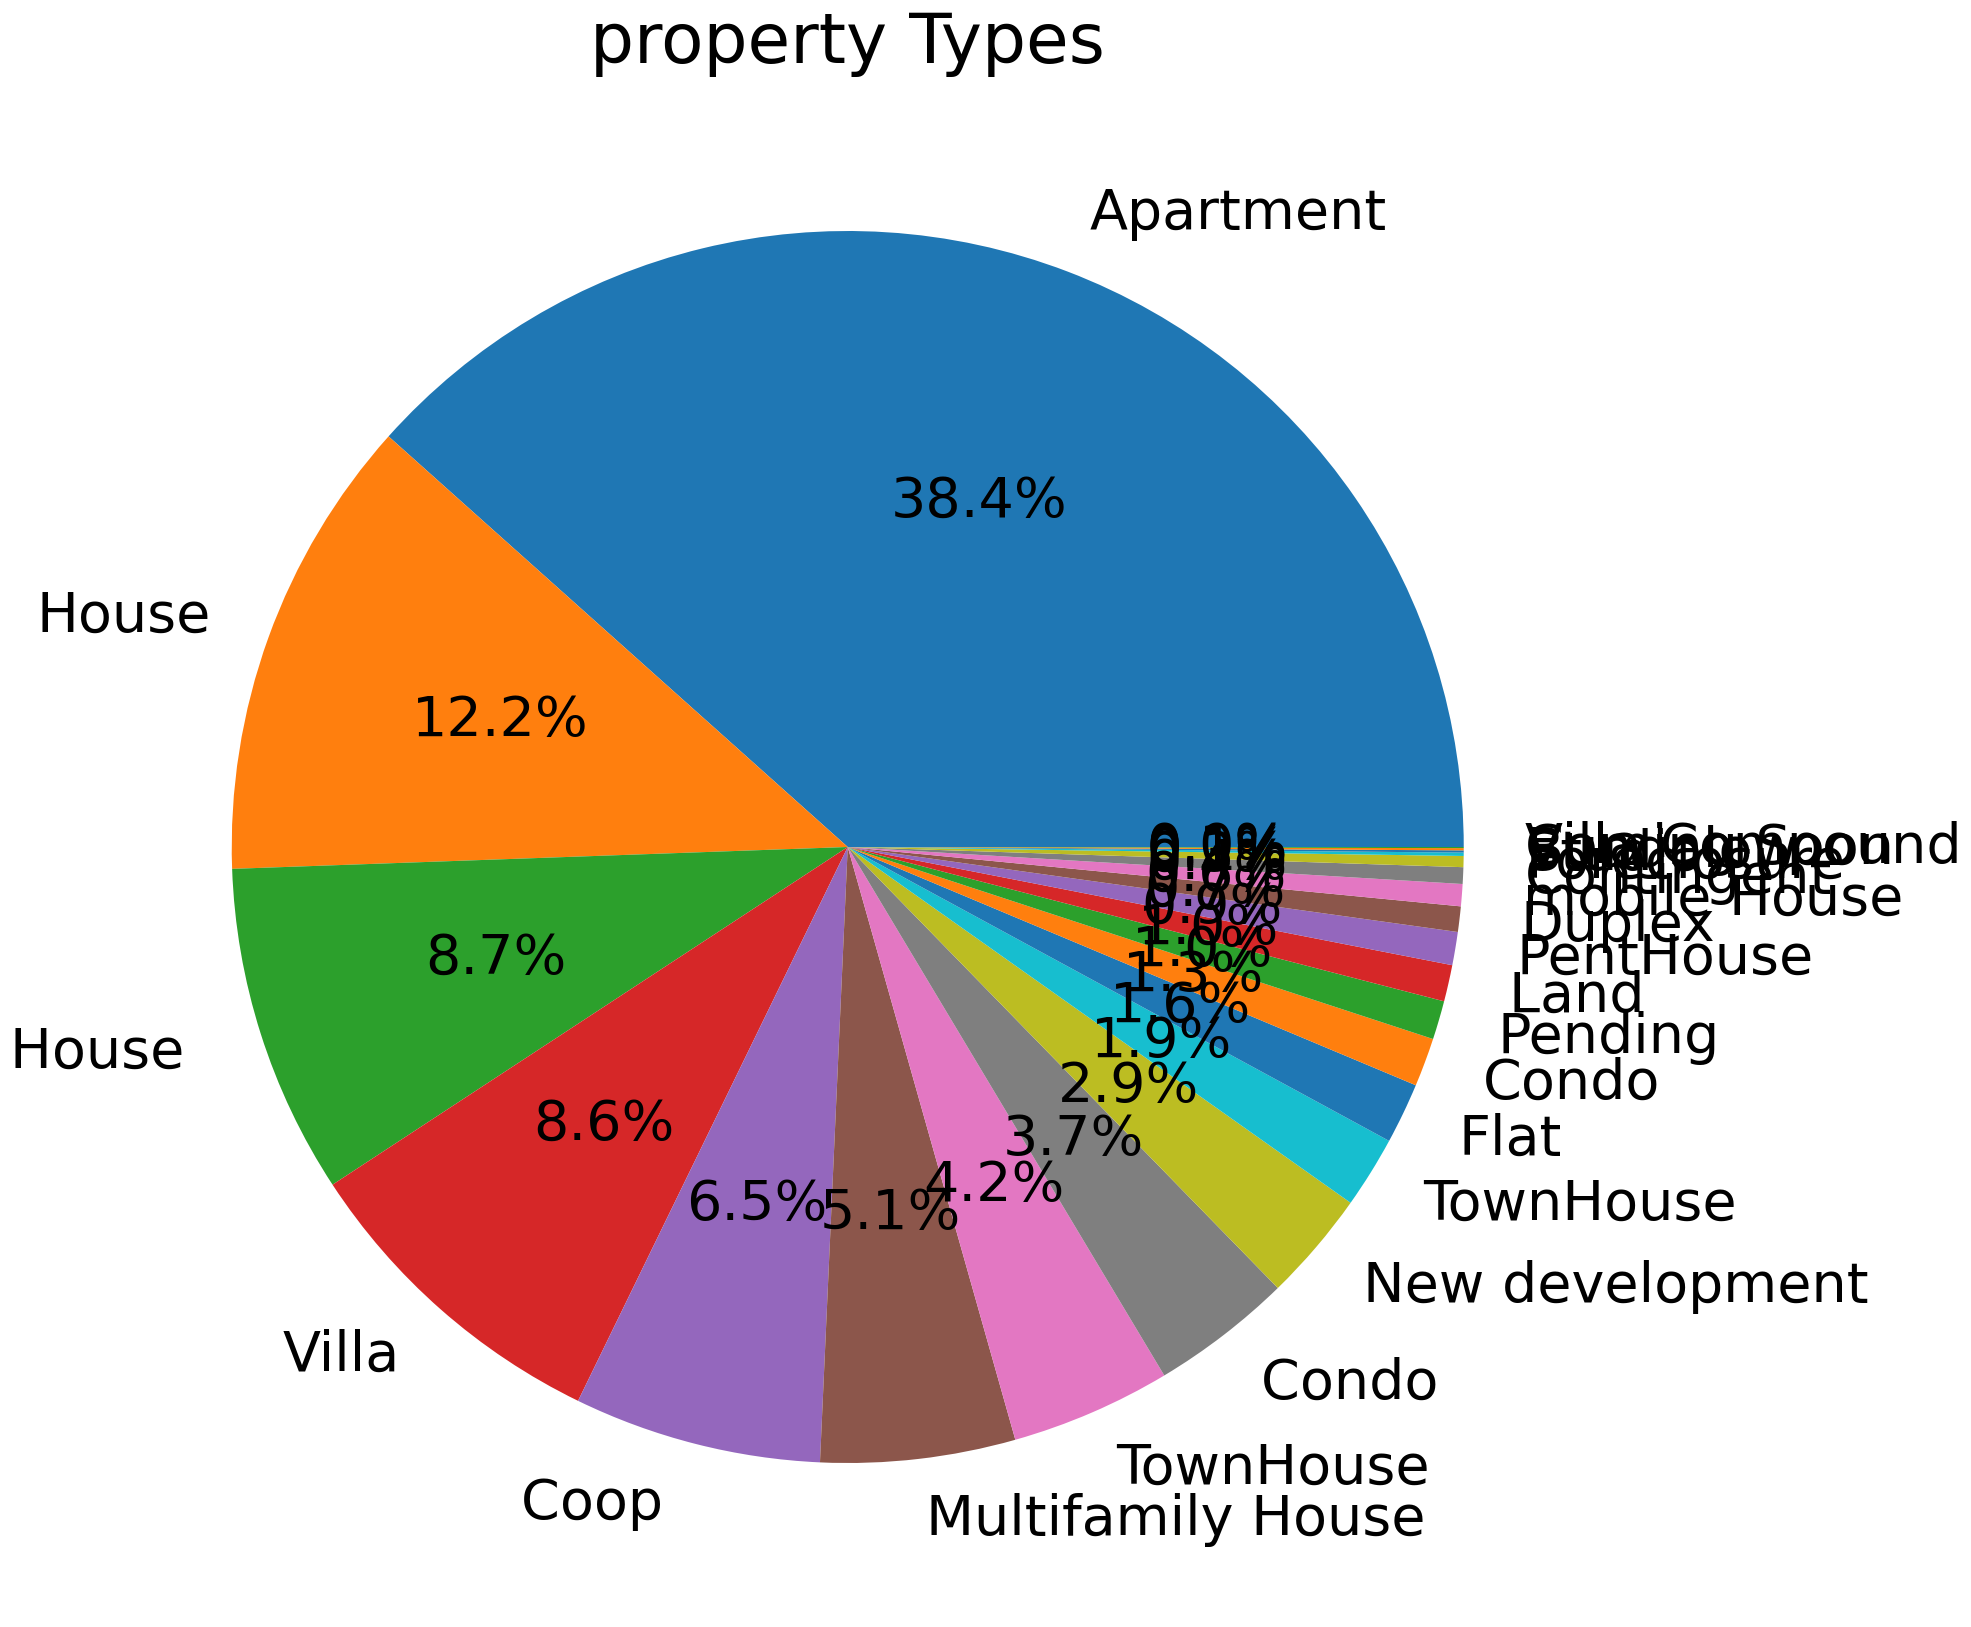

In [40]:
plt.figure(figsize=(30,20))
plt.pie(estate["property_type"].value_counts(),labels=estate["property_type"].value_counts().index,autopct="%0.1f%%", textprops={"fontsize":40})
plt.title('property Types',size=50)
plt.show()

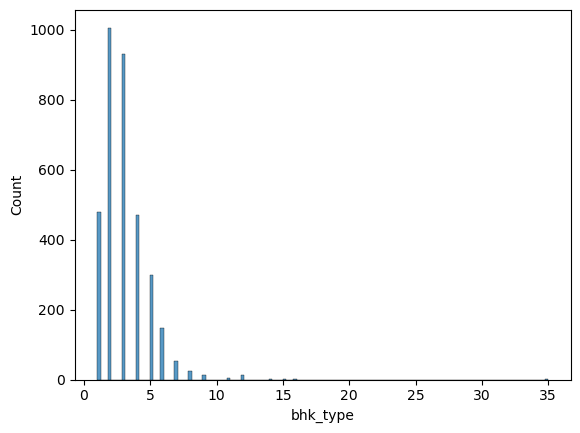

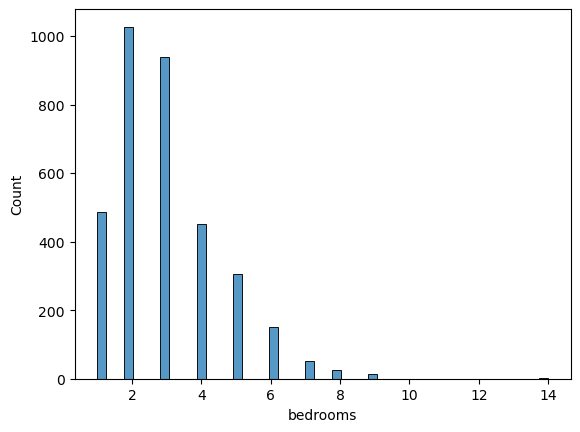

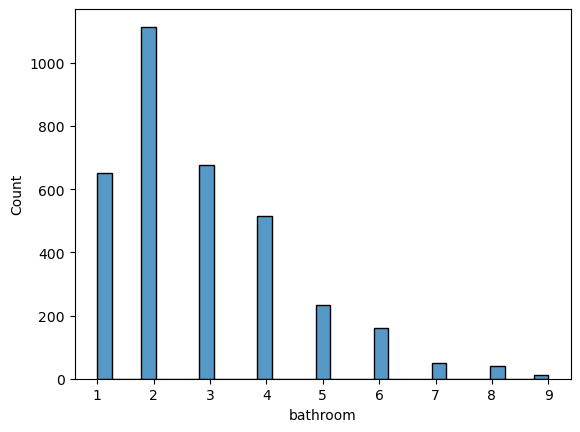

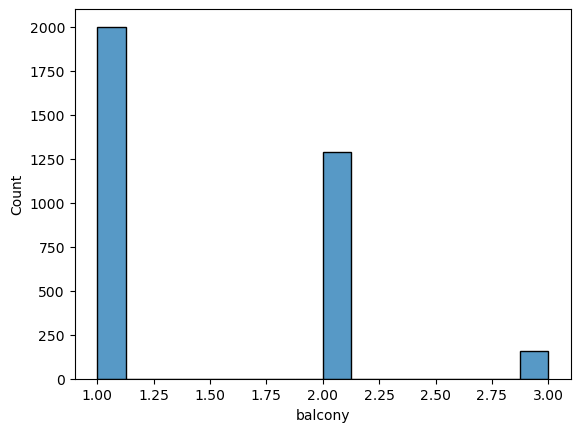

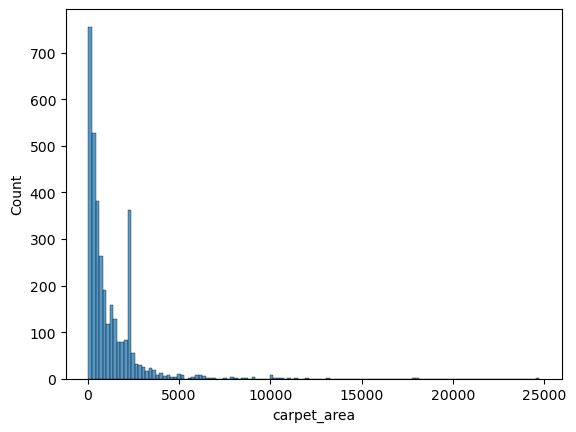

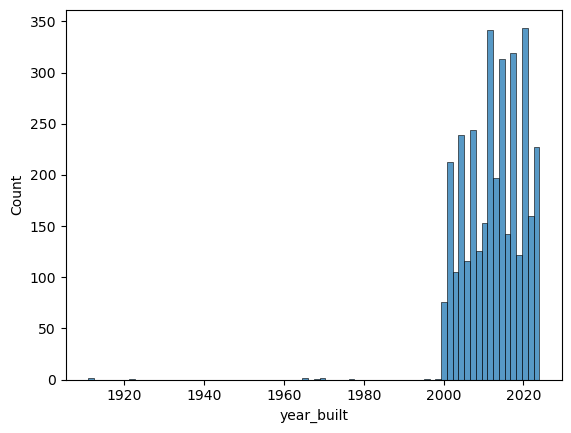

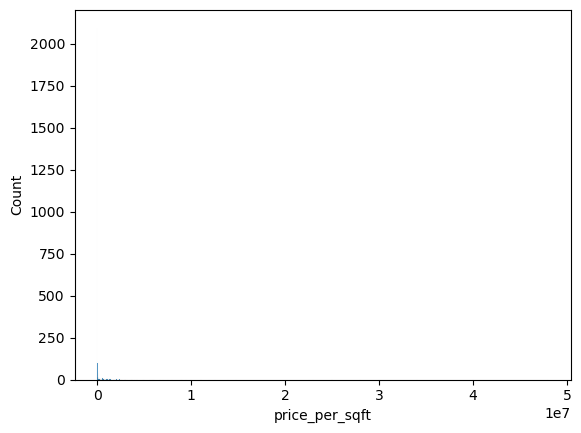

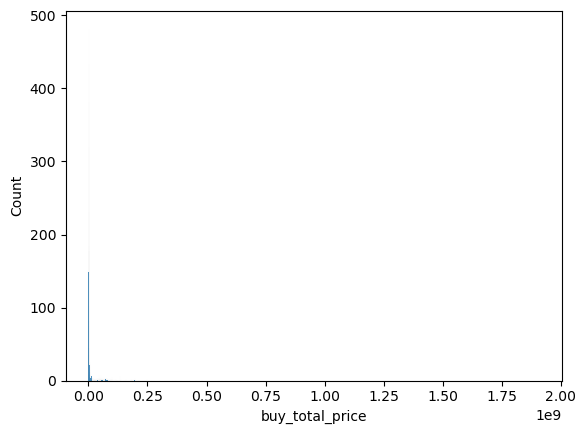

In [41]:
for i in estate.select_dtypes(include="number").columns:
    sns.histplot(data=estate,x=i)
    plt.show()

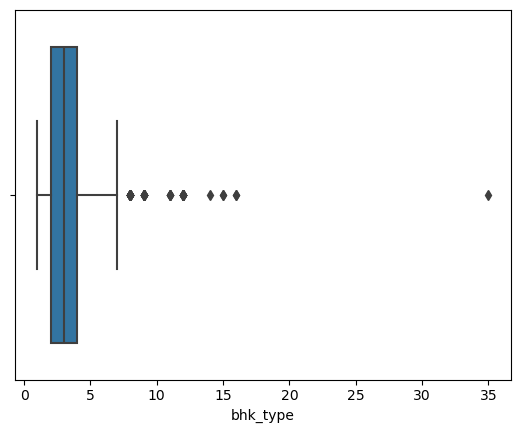

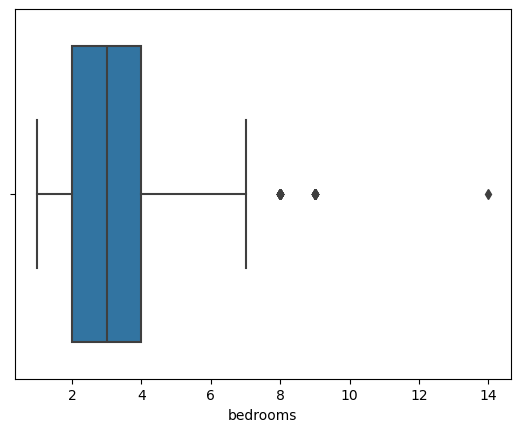

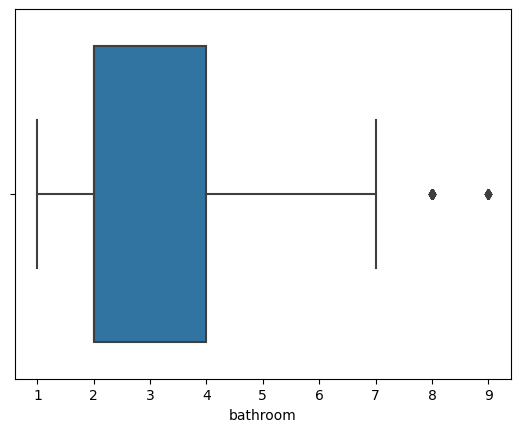

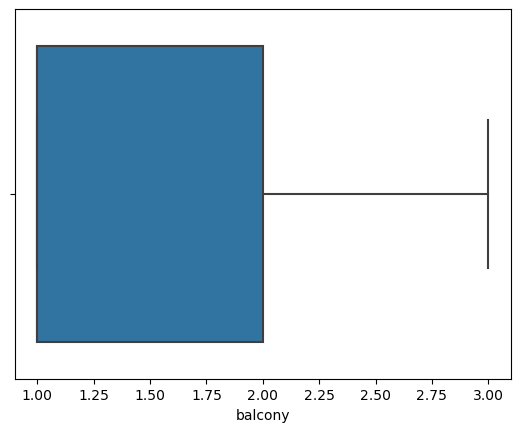

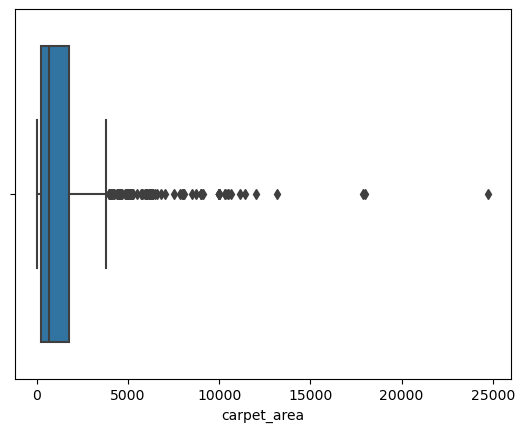

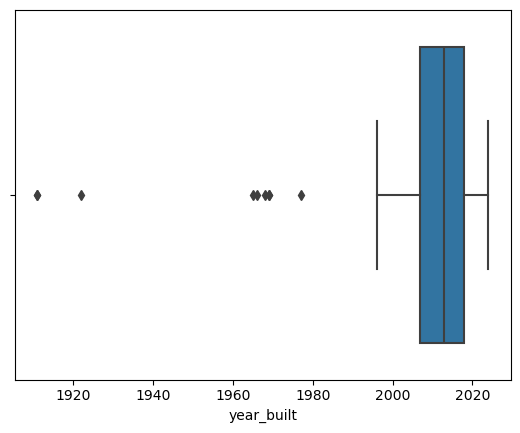

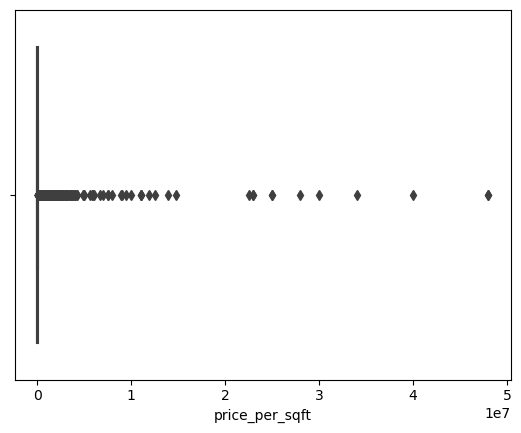

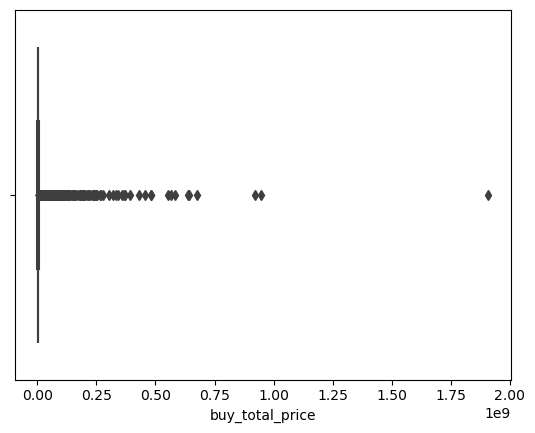

In [42]:
for i in estate.select_dtypes(include="number").columns:
    sns.boxplot(data=estate,x=i)
    plt.show()

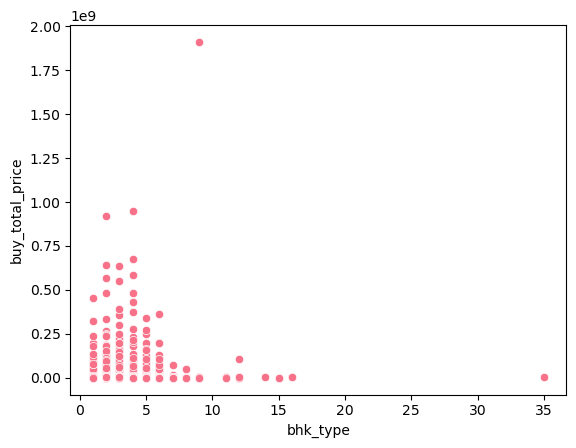

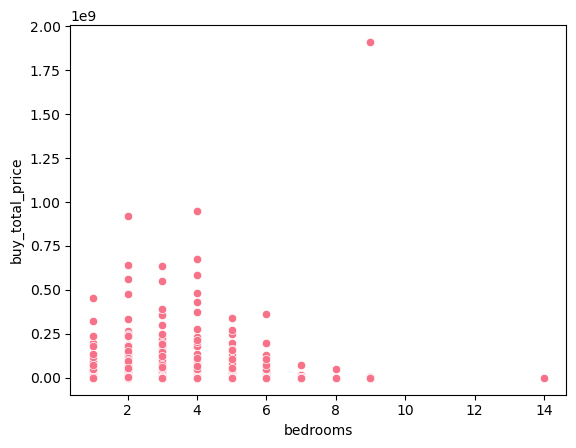

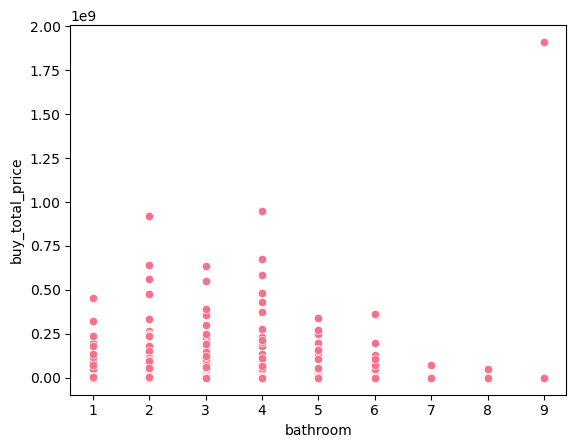

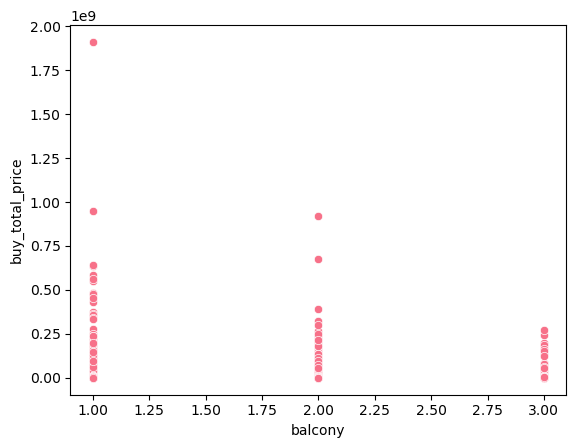

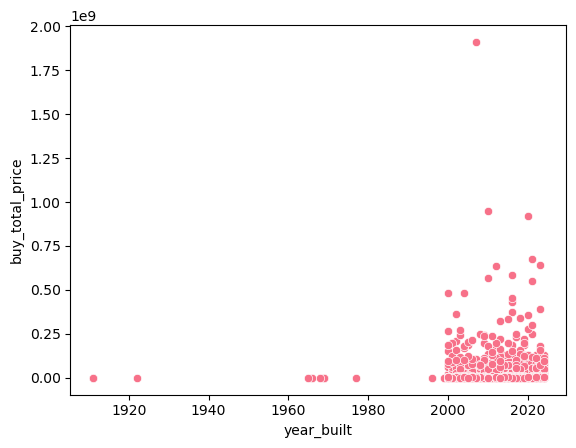

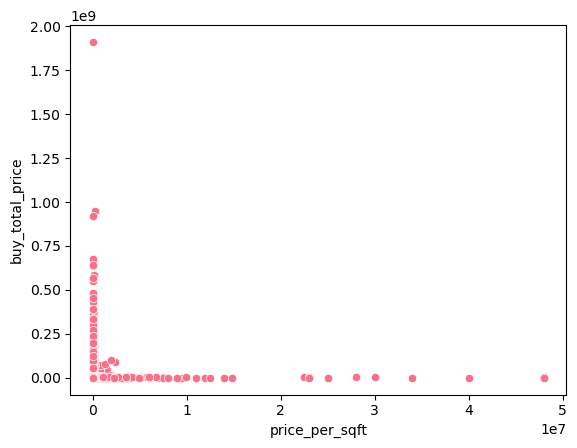

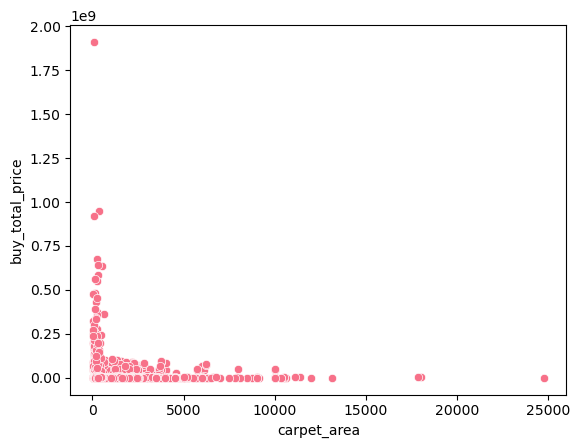

In [48]:
for i in ['bhk_type', 'bedrooms', 'bathroom', 'balcony',
       'year_built', 'price_per_sqft','carpet_area']:
    sns.scatterplot(data=estate,x=i,y='buy_total_price')
    plt.show()

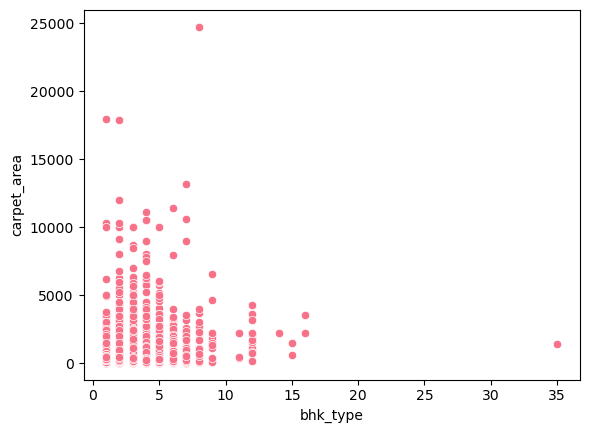

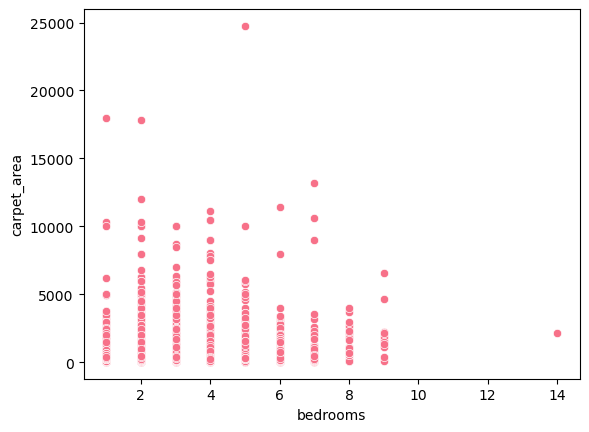

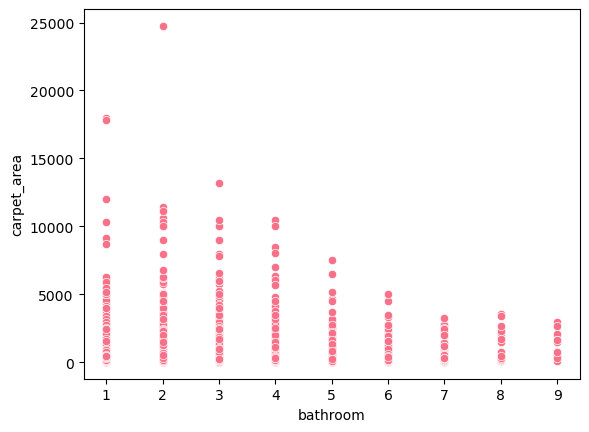

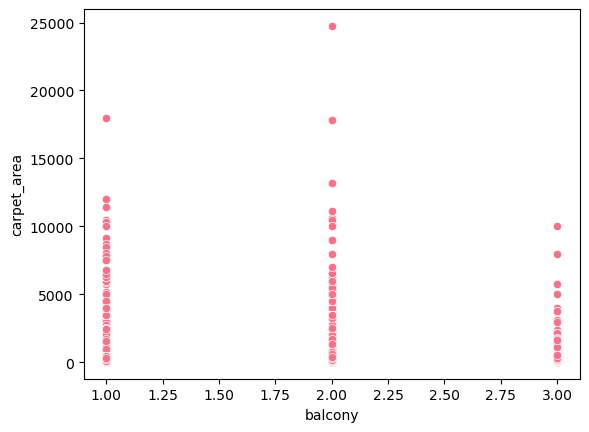

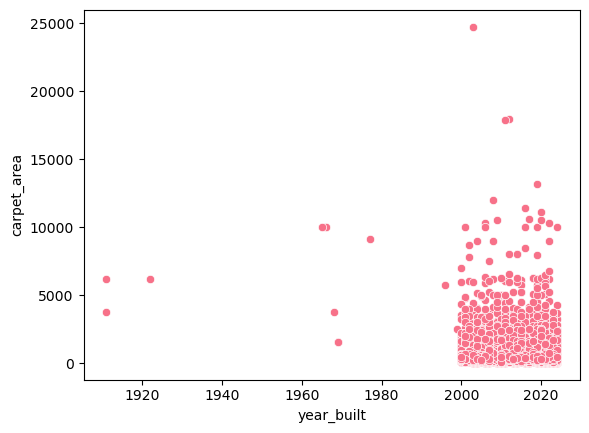

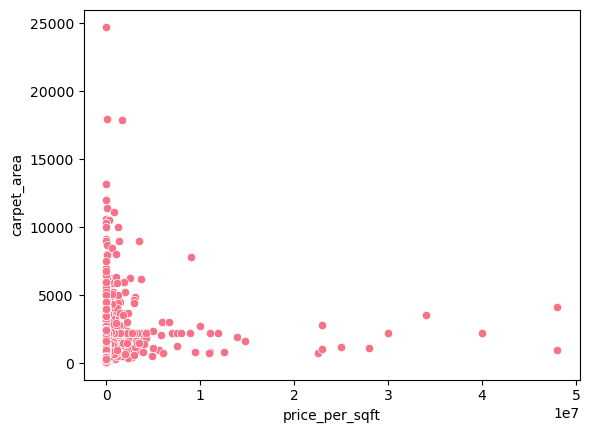

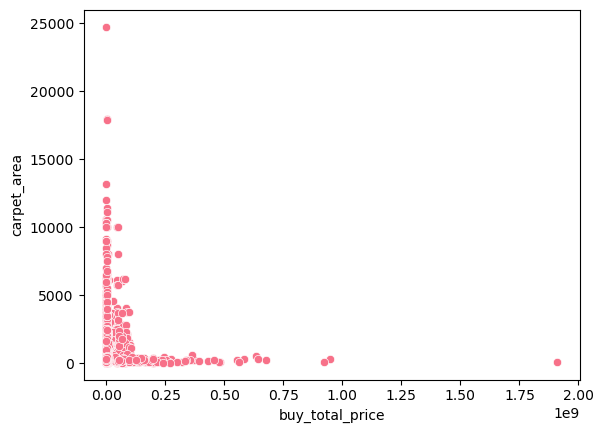

In [49]:
for i in ['bhk_type', 'bedrooms', 'bathroom', 'balcony',
       'year_built', 'price_per_sqft','buy_total_price']:
    sns.scatterplot(data=estate,x=i,y='carpet_area')
    plt.show()

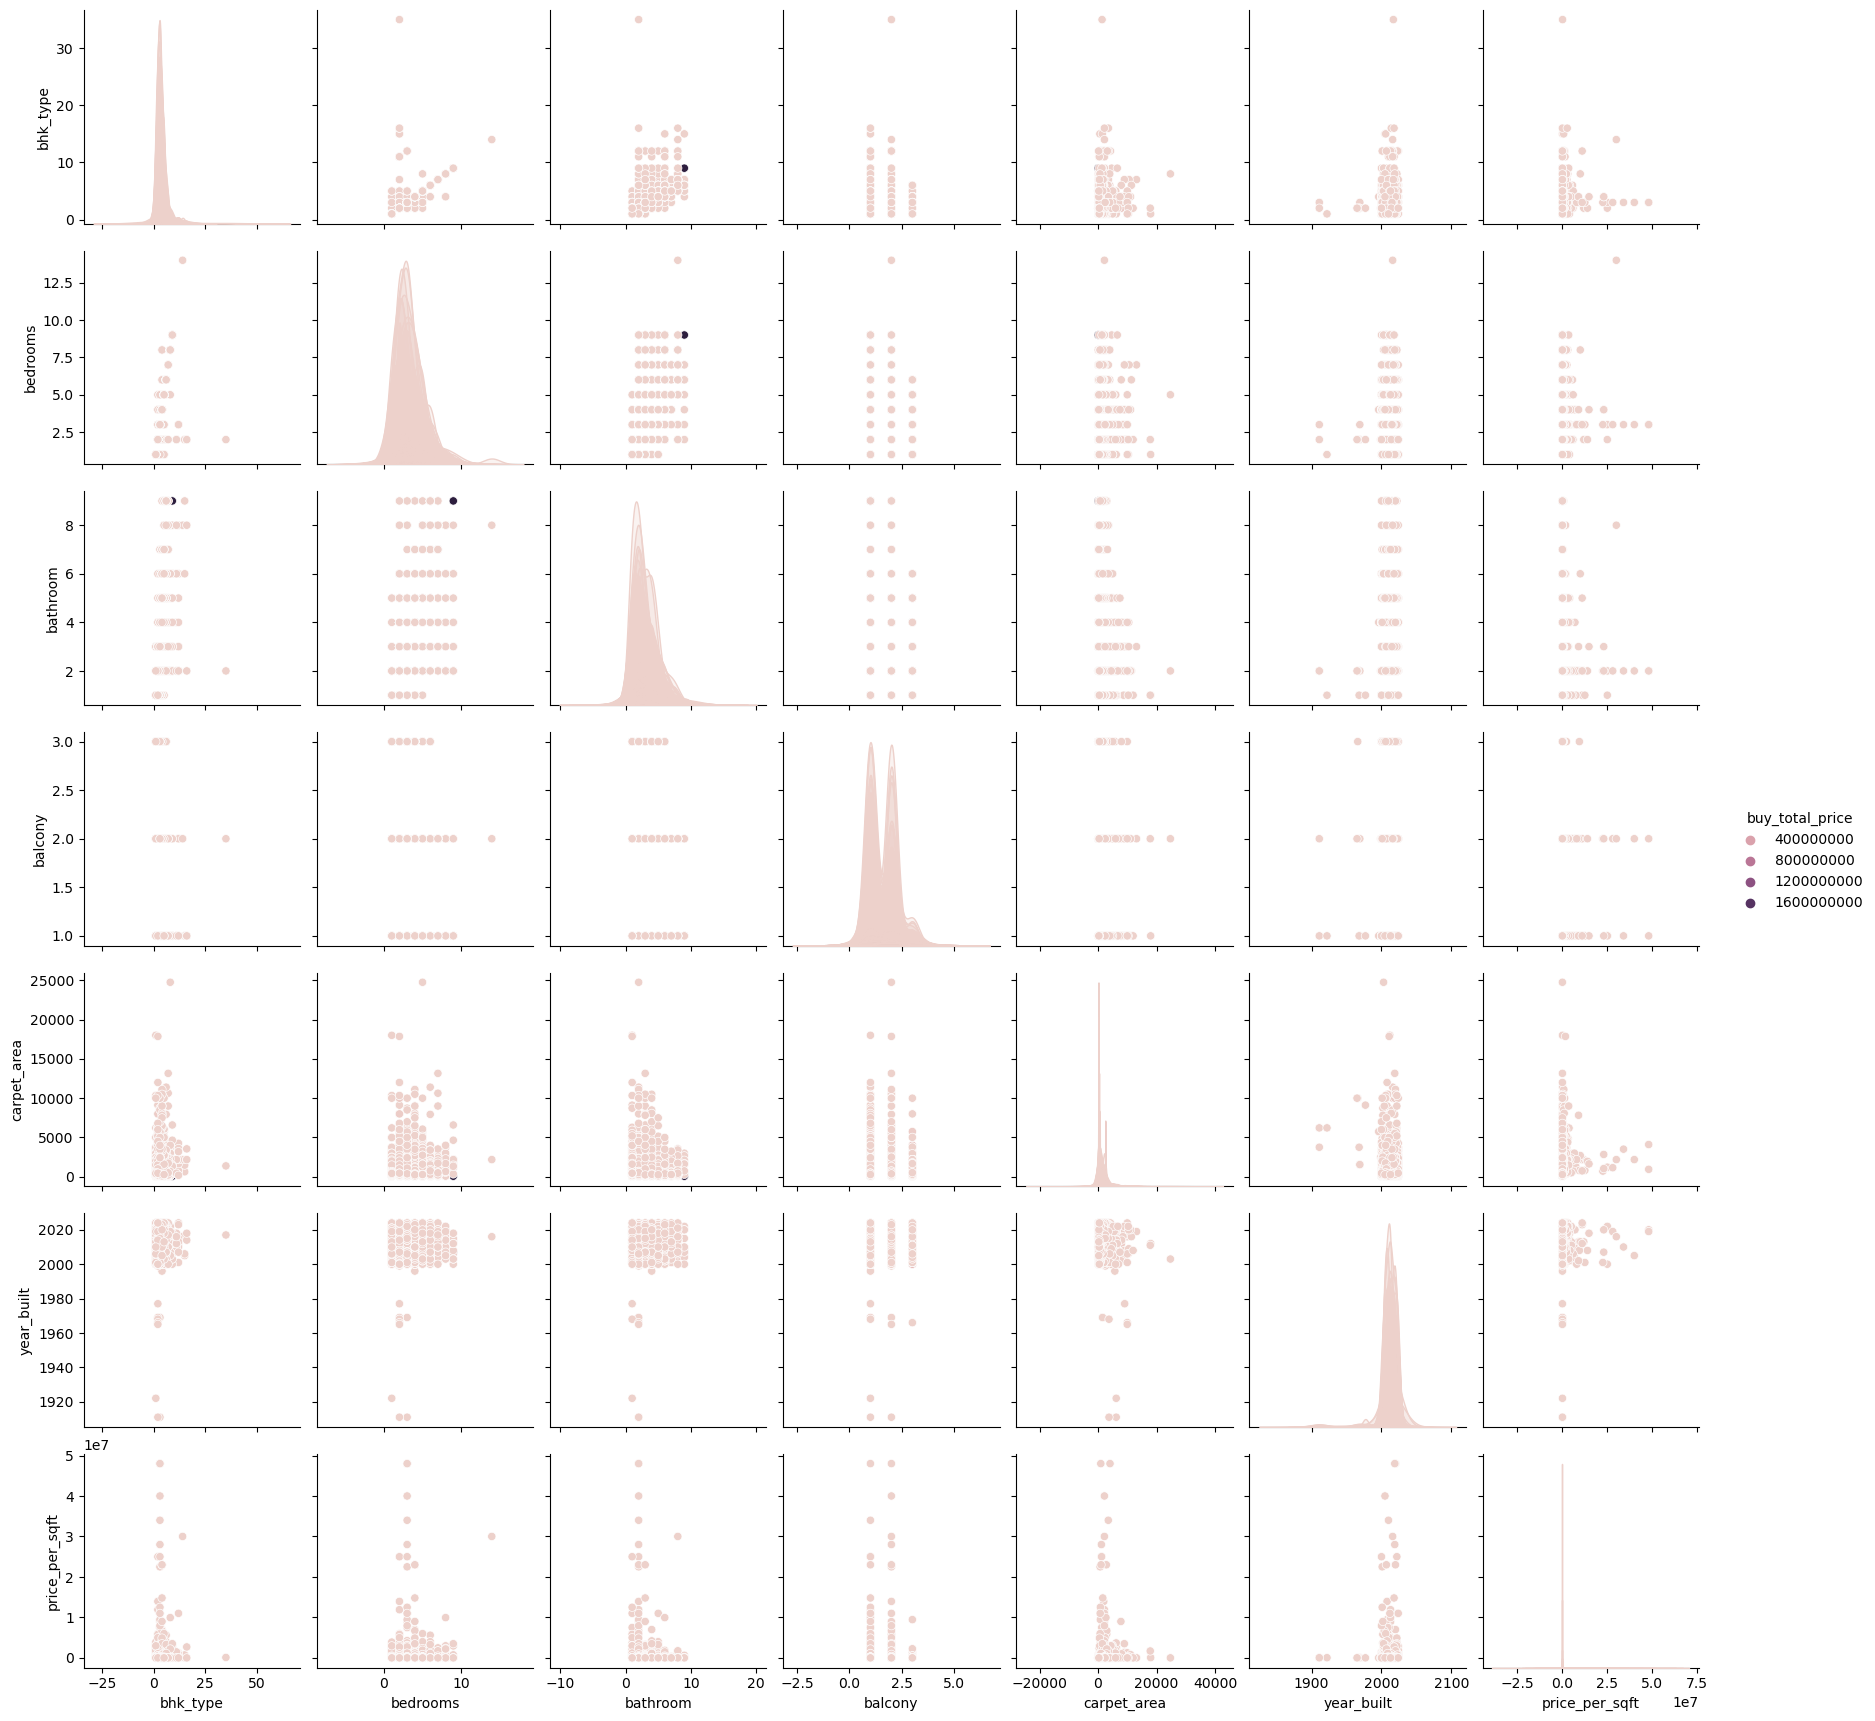

In [45]:
sns.set_palette("husl")
sns.pairplot(data=estate, hue='buy_total_price')
plt.show()

# Model Building

In [104]:
from sklearn.model_selection import train_test_split

X = estate.drop('buy_total_price', axis=1)  
y = estate['buy_total_price'] 

X_train, X_test, y_train_bt, y_test_bt = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
X = estate.drop('carpet_area', axis=1)  
y = estate['carpet_area']  

X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [109]:
model_bt_lr = LinearRegression()
model_ca_lr = LinearRegression()

model_bt_dt = DecisionTreeRegressor()
model_ca_dt = DecisionTreeRegressor()

model_bt_rf = RandomForestRegressor()
model_ca_rf = RandomForestRegressor()

In [110]:
model_bt_lr.fit(X_train, y_train_bt)
model_ca_lr.fit(X_train, y_train_ca)

model_bt_dt.fit(X_train, y_train_bt)
model_ca_dt.fit(X_train, y_train_ca)

model_bt_rf.fit(X_train, y_train_bt)
model_ca_rf.fit(X_train, y_train_ca)

RandomForestRegressor()

In [111]:
predictions_bt_lr = model_bt_lr.predict(X_test)
predictions_ca_lr = model_ca_lr.predict(X_test)

predictions_bt_dt = model_bt_dt.predict(X_test)
predictions_ca_dt = model_ca_dt.predict(X_test)

predictions_bt_rf = model_bt_rf.predict(X_test)
predictions_ca_rf = model_ca_rf.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

mse_bt_lr = mean_squared_error(y_test_bt, predictions_bt_lr)
r2_bt_lr = r2_score(y_test_bt, predictions_bt_lr)

In [114]:
print("Linear Regression Predictions for buy_total_price:", predictions_bt_lr)
print("Linear Regression Predictions for carpet_area:", predictions_ca_lr)

print("Decision Tree Regressor Predictions for buy_total_price:", predictions_bt_dt)
print("Decision Tree Regressor Predictions for carpet_area:", predictions_ca_dt)

print("Random Forest Regressor Predictions for buy_total_price:", predictions_bt_rf)
print("Random Forest Regressor Predictions for carpet_area:", predictions_ca_rf)

Linear Regression Predictions for buy_total_price: [2000000.57142145]
Linear Regression Predictions for carpet_area: [1500.00028571]
Decision Tree Regressor Predictions for buy_total_price: [1000000.]
Decision Tree Regressor Predictions for carpet_area: [2500.]
Random Forest Regressor Predictions for buy_total_price: [2220000.]
Random Forest Regressor Predictions for carpet_area: [1580.]


In [115]:
from sklearn.metrics import mean_squared_error

mse_bt_dt = mean_squared_error(y_test_bt, predictions_bt_dt)
mse_ca_dt = mean_squared_error(y_test_ca, predictions_ca_dt)

mse_bt_rf = mean_squared_error(y_test_bt, predictions_bt_rf)
mse_ca_rf = mean_squared_error(y_test_ca, predictions_ca_rf)

print("Mean Squared Error for buy_total_price (Decision Tree):", mse_bt_dt)
print("Mean Squared Error for carpet_area (Decision Tree):", mse_ca_dt)

print("Mean Squared Error for buy_total_price (Random Forest):", mse_bt_rf)
print("Mean Squared Error for carpet_area (Random Forest):", mse_ca_rf)


Mean Squared Error for buy_total_price (Decision Tree): 1000000000000.0
Mean Squared Error for carpet_area (Decision Tree): 1000000.0
Mean Squared Error for buy_total_price (Random Forest): 48400000000.0
Mean Squared Error for carpet_area (Random Forest): 6400.0


In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

data = {
    'property_type_1': [1, 0, 0, 0, 0],
    'property_type_2': [0, 1, 0, 0, 0],
    'property_type_3': [0, 0, 1, 0, 0],
    'property_type_Apartment': [0, 0, 0, 1, 0],
    'property_type_Villa': [0, 0, 0, 0, 1],
    'buy_total_price': [1000000, 1500000, 2000000, 2500000, 3000000],
    'carpet_area': [500, 750, 1000, 1250, 1500]
}

estate = pd.DataFrame(data)

estate['property_type'] = estate[['property_type_1', 'property_type_2', 'property_type_3', 'property_type_Apartment', 'property_type_Villa']].idxmax(axis=1)

property_type_mapping = {
    'property_type_1': 'House',
    'property_type_2': 'Type_2',
    'property_type_3': 'Type_3',
    'property_type_Apartment': 'Apartment',
    'property_type_Villa': 'Villa'
}
estate['property_type'] = estate['property_type'].map(property_type_mapping)

estate = estate.drop(columns=['property_type_1', 'property_type_2', 'property_type_3', 'property_type_Apartment', 'property_type_Villa'])

le_property_type = LabelEncoder()
estate['property_type_encoded'] = le_property_type.fit_transform(estate['property_type'])

X = estate.drop(columns=['property_type', 'property_type_encoded'])
y_property_type = estate['property_type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y_property_type, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
predicted_types_lr = le_property_type.inverse_transform(predictions_lr.round().astype(int))
print("Linear Regression Predictions for property_type:", predicted_types_lr)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
predicted_types_dt = le_property_type.inverse_transform(predictions_dt.round().astype(int))
print("Decision Tree Regression Predictions for property_type:", predicted_types_dt)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
predicted_types_rf = le_property_type.inverse_transform(predictions_rf.round().astype(int))
print("Random Forest Regression Predictions for property_type:", predicted_types_rf)


Linear Regression Predictions for property_type: ['House']
Decision Tree Regression Predictions for property_type: ['House']
Random Forest Regression Predictions for property_type: ['House']


Mean Squared Error: 633.0757939828766
R^2 Score: 0.6991154616789814


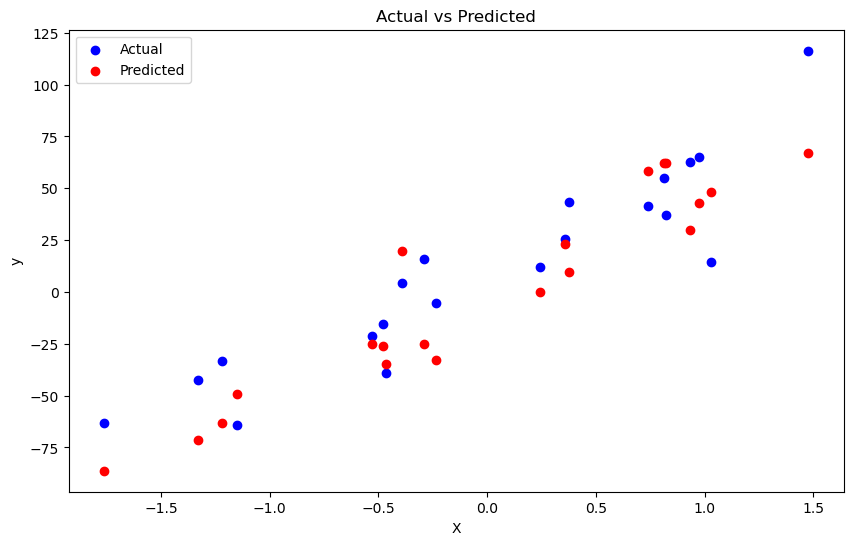

In [154]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import joblib

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

best_model_filename = 'best_model_rf.pkl'
joblib.dump(model, best_model_filename)
print(f"Best model saved as {best_model_filename}")


R^2 Score: 0.6991154616789814
Best model saved as best_model_rf.pkl


# Mean Squared Error (MSE): This metric quantifies the average squared difference between actual and predicted values. A lower MSE indicates better model performance.# Root Mean Squared Error (RMSE): The square root of MSE. It provides a measure of the average absolute error.
# 
R² Score (Coefficient of Determination): R² represents the proportion of variance in the dependent variable explained by the independent variable
#n R² score of 0.70 (approximately) means that around 69.91% of the variance is explained by the model.
